In [25]:
# examine the monthly mean spatial distribution of omf vs omf without varBC
# initial built: 06/17/2024

import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
print(cartopy.__version__)

0.21.1


In [403]:
avg_period = '2022062000_2022072000'
expids     = ['CTRL','CTRL_no_situ']
exptest    = 'CTRL_no_situ'
expref     = 'CTRL'
instr      = 'amsua'
channel    = '1'
meshsize   = '5.0'

In [404]:
omf={}; omfnbc={};

savefig_dir = f'/home/Chih-Chi.Hu/python_codes/figures/rad_varBC_effect/{instr}/ch{channel}/'

if not os.path.exists(savefig_dir):
    os.makedirs(savefig_dir)

for exp in expids:
    path_dir   = f'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/gsidiag/ush/radstats/data/meshmean/{avg_period}/{exp}/mesh{meshsize}/'
    fn = path_dir + f'meshmean_ges_omf_{instr}_{channel}_{exp}.npz'
    omf[exp] = np.load(fn)
    
    fn = path_dir + f'meshmean_ges_omfnbc_{instr}_{channel}_{exp}.npz'
    omfnbc[exp] = np.load(fn)

In [405]:
# setup the grid
dx = float(meshsize)
lon = np.arange(0.0+dx*0.5, 360.0+dx*0.5, dx)
lat = np.arange(-90.0+dx*0.5, 90.0+dx*0.5, dx)
lons, lats = np.meshgrid(lon,lat)

In [406]:
# mask out pixels with few data points:
mask={};
min_data = 500;
for exp in expids:
    mask[exp] = (omf[exp]['ctmesh'] > min_data) & (omfnbc[exp]['ctmesh'] > min_data)

In [407]:
# colorscale parameters:
# note that diff_max = 40% of the colorbar range for plotting the omf in obs_space_omf_meshplot_rad_monthly_mean
reduce_factor = 0.2

savefig = True

if instr == 'atms':
    if channel in ('16'):
        min_data = 500; val_max  = 4.0;  diff_max = 4.0*reduce_factor;   
    elif channel in ('17'):
        min_data = 500; val_max  = 4.0;  diff_max = 5.0*reduce_factor;    
    elif channel in ('18'):
        min_data = 500; val_max  = 4.0;  diff_max = 4.0*reduce_factor;   
    elif channel in ('19'):
        min_data = 500; val_max  = 3.5;  diff_max = 3.5*reduce_factor;   
    elif channel in ('20'):
        min_data = 500; val_max  = 2.5;  diff_max = 2.5*reduce_factor;   
    elif channel in ('21'):
        min_data = 500; val_max  = 1.5;  diff_max = 1.5*reduce_factor;  
    elif channel in ('22'):
        min_data = 500; val_max  = 1.5;  diff_max = 1.5*reduce_factor; 
        
        
elif instr == 'amsua':
    if channel in ('1'):
        min_data = 500; val_max  = 3;  diff_max = 3.5*reduce_factor;
    elif channel in ('2'):
        min_data = 500; val_max  = 3;  diff_max = 5*reduce_factor;  
    elif channel in ('3'):
        min_data = 500; val_max  = 3;  diff_max = 3*reduce_factor;  
    elif channel in ('4'):
        min_data = 500; val_max  = 1;  diff_max = 0.5*reduce_factor;  
    elif channel in ('5'):
        min_data = 500; val_max  = 1;  diff_max = 0.2*reduce_factor; 
    elif channel in ('6'):
        min_data = 500; val_max  = 1.8; diff_max = 0.15*reduce_factor;
    elif channel in ('7'):
        min_data = 500; val_max  = 1.8; diff_max = 0.15*reduce_factor; 
    elif channel in ('8'):
        min_data = 500; val_max  = 1.2; diff_max = 0.15*reduce_factor; 
    elif channel in ('9'):
        min_data = 500; val_max  = 1.2; diff_max = 0.18*reduce_factor; 
    elif channel in ('10'):
        min_data = 500; val_max  = 1.5; diff_max = 0.20*reduce_factor; 
    elif channel in ('11'):
        min_data = 500; val_max  = 1.5; diff_max = 0.35*reduce_factor; 
    elif channel in ('12'):
        min_data = 500; val_max  = 1.2; diff_max = 0.70*reduce_factor;  
    elif channel in ('13'):
        min_data = 500; val_max  = 1.2; diff_max = 1.2*reduce_factor; 
    elif channel in ('15'):
        min_data = 500; val_max  = 4.50; diff_max = 4.5*reduce_factor;

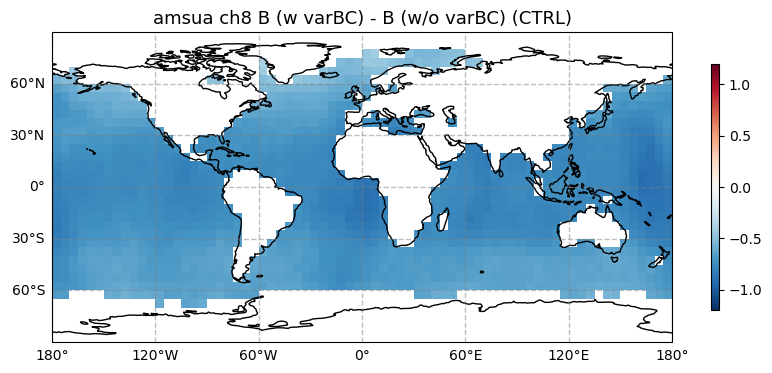

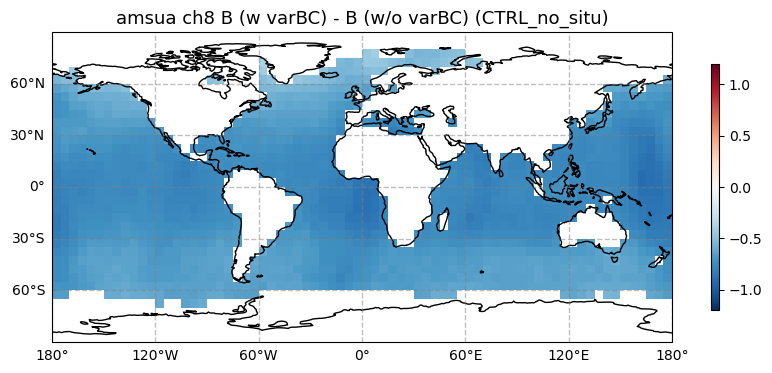

In [365]:
# plot "varBC increment" := B (with varBC) - B (without varBC) 

for exp in expids:
    pltvar   = omfnbc[exp]['omfmesh'] - omf[exp]['omfmesh']
    pltvar[~mask[exp]] = np.nan

    val_min  = -val_max

    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(10,8))
    ax.coastlines()
    contour1=ax.pcolormesh(lons, lats, pltvar, cmap='RdBu_r', vmin=val_min, vmax=val_max)

    #nan_y, nan_x = np.where(np.isnan(pltvar))
    #ax.scatter(nan_x, nan_y, color='gray', label='NaN values')

    ax.tick_params(axis='x', labelsize=14)  # Set the size to 14 points
    ax.tick_params(axis='y', labelsize=14)  # Set the size to 14 points
    #ax.set_ylim(-80,80)
    ax.grid(True)
    cbar = fig.colorbar(contour1,location='right',aspect=30, shrink=0.4, pad=0.05)
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    ax.set_title(f'{instr} ch{channel} B (w varBC) - B (w/o varBC) ({exp})',fontsize=13)
    if savefig:
        plt.savefig(f'{savefig_dir}monthly_avg_{instr}_ch{channel}_varBCinc_{exp}.png', dpi=200, bbox_inches='tight')


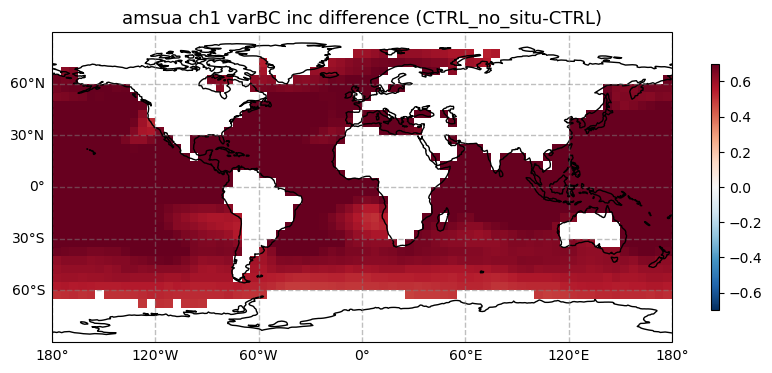

In [408]:
# difference in varBC increment:

pltvar = (omfnbc[exptest]['omfmesh'] - omf[exptest]['omfmesh']) - (omfnbc[expref]['omfmesh'] - omf[expref]['omfmesh'])
pltvar[~mask[exp]] = np.nan

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(10,8))
ax.coastlines()
contour1=ax.pcolormesh(lons, lats, pltvar, cmap='RdBu_r', vmin=-diff_max, vmax=diff_max)

ax.tick_params(axis='x', labelsize=14)  # Set the size to 14 points
ax.tick_params(axis='y', labelsize=14)  # Set the size to 14 points
#ax.set_ylim(-80,80)
ax.grid(True)
cbar = fig.colorbar(contour1,location='right',aspect=30, shrink=0.4, pad=0.05)
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Hide labels on the top side
gl.right_labels = False  # Hide labels on the right side
ax.set_title(f'{instr} ch{channel} varBC inc difference ({exptest}-{expref})',fontsize=13)
if savefig:
    plt.savefig(f'{savefig_dir}monthly_avg_{instr}_ch{channel}_dvarBCinc_{exptest}-{expref}.png', dpi=200, bbox_inches='tight')